## Load Libraries

In [192]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier# Import Decision Tree Classifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier 
from sklearn. preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay,roc_curve, auc
from sklearn.model_selection import train_test_split # Import train_test_split function
import matplotlib.pyplot as plt
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [193]:
df = pd.read_csv('X_choc.csv')

## Split dataset in features and target variable

In [195]:
feature_cols = ['age', 'gender', 'education', 'country','ethnicity','nscore','escore','oscore','ascore','cscore','impuslive','ss']
X = df[feature_cols] # Features
y = df.chocolate # Target variable

## undersampling

In [197]:
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

## oversampling

In [199]:
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

## combining undersampling and oversampling

In [201]:
# Step 1: Undersampling the majority class
undersample = RandomUnderSampler(sampling_strategy=0.5, random_state=42)
X_under, y_under = undersample.fit_resample(X, y)

# Step 2: Oversampling the minority class
smote = SMOTE(sampling_strategy=0.75, random_state=42)
X_combined, y_combined = smote.fit_resample(X_under, y_under)

# Now you can split the rebalanced dataset into training and test sets
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, y_combined, test_size=0.3, random_state=42)

In [202]:
# Split undersampled dataset into training set and test set
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_smote, y_smote, test_size=0.3, random_state=1) # 70% training and 30% test

In [203]:
# Split oversampled dataset into training set and test set
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=1) # 70% training and 30% test

## Create Decision Tree classifer object

In [205]:
clf = DecisionTreeClassifier()

# undersampling
clf_under = clf.fit(X_train_under,y_train_under)
y_pred_under = clf_under.predict(X_test_under)

accuracy_DT_under = accuracy_score(y_test_under, y_pred_under)
precision_DT_under = precision_score(y_test_under, y_pred_under, pos_label="user")
recall_DT_under = recall_score(y_test_under, y_pred_under, pos_label="user")

print("Accuracy_DT_under:",accuracy_DT_under)
print("Precision_DT_under:", precision_DT_under)
print("Recall_DT_under:", recall_DT_under)

cm_DT_under = confusion_matrix(y_test_under, y_pred_under)
print(cm_DT_under)

# oversampling
clf_over = clf.fit(X_train_over,y_train_over)
y_pred_over = clf_over.predict(X_test_over)

accuracy_DT_over = accuracy_score(y_test_over, y_pred_over)
precision_DT_over = precision_score(y_test_over, y_pred_over, pos_label="user")
recall_DT_over = recall_score(y_test_over, y_pred_over, pos_label="user")

print("Accuracy_DT_over:",accuracy_DT_over)
print("Precision_DT_over:", precision_DT_over)
print("Recall_DT_over:", recall_DT_over)

cm_DT_over = confusion_matrix(y_test_over, y_pred_over)
print(cm_DT_over)

# combined
clf_combined = clf.fit(X_train_combined,y_train_combined)
y_pred_combined = clf_combined.predict(X_test_combined)

accuracy_DT_combined = accuracy_score(y_test_combined, y_pred_combined)
precision_DT_combined = precision_score(y_test_combined, y_pred_combined, pos_label="user")
recall_DT_combined = recall_score(y_test_combined, y_pred_combined, pos_label="user")

print("Accuracy_DT_combined:",accuracy_DT_combined)
print("Precision_DT_combined:", precision_DT_combined)
print("Recall_DT_combined:", recall_DT_combined)

cm_DT_combined= confusion_matrix(y_test_combined, y_pred_combined)
print(cm_DT_combined)

Accuracy_DT_under: 0.9612612612612612
Precision_DT_under: 0.9819168173598554
Recall_DT_under: 0.9427083333333334
[[524  10]
 [ 33 543]]
Accuracy_DT_over: 0.981081081081081
Precision_DT_over: 1.0
Recall_DT_over: 0.9635416666666666
[[534   0]
 [ 21 555]]
Accuracy_DT_combined: 0.7027027027027027
Precision_DT_combined: 0.68
Recall_DT_combined: 0.85
[[ 9  8]
 [ 3 17]]


## Create randomforest classifer object

In [207]:
clf = RandomForestClassifier()

# undersampling
clf_under = clf.fit(X_train_under,y_train_under)
y_pred_under = clf_under.predict(X_test_under)

accuracy_RF_under = accuracy_score(y_test_under, y_pred_under)
precision_RF_under = precision_score(y_test_under, y_pred_under, pos_label="user")
recall_RF_under = recall_score(y_test_under, y_pred_under, pos_label="user")

print("Accuracy_RF_under:",accuracy_RF_under)
print("Precision_RF_under:", precision_RF_under)
print("Recall_RF_under:", recall_RF_under)

cm_RF_under = confusion_matrix(y_test_under, y_pred_under)
print(cm_RF_under)

# oversampling
clf_over = clf.fit(X_train_over,y_train_over)
y_pred_over = clf_over.predict(X_test_over)

accuracy_RF_over = accuracy_score(y_test_over, y_pred_over)
precision_RF_over = precision_score(y_test_over, y_pred_over, pos_label="user")
recall_RF_over = recall_score(y_test_over, y_pred_over, pos_label="user")

print("Accuracy_RF_over:",accuracy_RF_over)
print("Precision_RF_over:", precision_RF_over)
print("Recall_RF_over:", recall_RF_over)

cm_RF_over = confusion_matrix(y_test_over, y_pred_over)
print(cm_RF_over)

# combined
clf_combined = clf.fit(X_train_combined,y_train_combined)
y_pred_combined = clf_combined.predict(X_test_combined)

accuracy_RF_combined = accuracy_score(y_test_combined, y_pred_combined)
precision_RF_combined = precision_score(y_test_combined, y_pred_combined, pos_label="user")
recall_RF_combined = recall_score(y_test_combined, y_pred_combined, pos_label="user")

print("Accuracy_RF_combined:",accuracy_RF_combined)
print("Precision_RF_combined:", precision_RF_combined)
print("Recall_RF_combined:", recall_RF_combined)

cm_RF_combined= confusion_matrix(y_test_combined, y_pred_combined)
print(cm_RF_combined)

Accuracy_RF_under: 0.9963963963963964
Precision_RF_under: 0.993103448275862
Recall_RF_under: 1.0
[[530   4]
 [  0 576]]
Accuracy_RF_over: 1.0
Precision_RF_over: 1.0
Recall_RF_over: 1.0
[[534   0]
 [  0 576]]
Accuracy_RF_combined: 0.7567567567567568
Precision_RF_combined: 0.7619047619047619
Recall_RF_combined: 0.8
[[12  5]
 [ 4 16]]


## Create Support Vector Machine classifer object

In [209]:
clf = svm.SVC(kernel='linear')

# undersampling
clf_under = clf.fit(X_train_under,y_train_under)
y_pred_under = clf_under.predict(X_test_under)

accuracy_SVM_under = accuracy_score(y_test_under, y_pred_under)
precision_SVM_under = precision_score(y_test_under, y_pred_under, pos_label="user")
recall_SVM_under = recall_score(y_test_under, y_pred_under, pos_label="user")

print("Accuracy_SVM_under:",accuracy_SVM_under)
print("Precision_SVM_under:", precision_SVM_under)
print("Recall_SVM_under:", recall_SVM_under)

cm_SVM_under = confusion_matrix(y_test_under, y_pred_under)
print(cm_SVM_under)

# oversampling
clf_over = clf.fit(X_train_over,y_train_over)
y_pred_over = clf_over.predict(X_test_over)

accuracy_SVM_over = accuracy_score(y_test_over, y_pred_over)
precision_SVM_over = precision_score(y_test_over, y_pred_over, pos_label="user")
recall_SVM_over = recall_score(y_test_over, y_pred_over, pos_label="user")

print("Accuracy_SVM_over:",accuracy_SVM_over)
print("Precision_SVM_over:", precision_SVM_over)
print("Recall_SVM_over:", recall_SVM_over)

cm_SVM_over = confusion_matrix(y_test_over, y_pred_over)
print(cm_SVM_over)

# combined
clf_combined = clf.fit(X_train_combined,y_train_combined)
y_pred_combined = clf_combined.predict(X_test_combined)

accuracy_SVM_combined = accuracy_score(y_test_combined, y_pred_combined)
precision_SVM_combined = precision_score(y_test_combined, y_pred_combined, pos_label="user")
recall_SVM_combined = recall_score(y_test_combined, y_pred_combined, pos_label="user")

print("Accuracy_SVM_combined:",accuracy_SVM_combined)
print("Precision_SVM_combined:", precision_SVM_combined)
print("Recall_SVM_combined:", recall_SVM_combined)

cm_SVM_combined= confusion_matrix(y_test_combined, y_pred_combined)
print(cm_SVM_combined)

Accuracy_SVM_under: 0.7477477477477478
Precision_SVM_under: 0.8936170212765957
Recall_SVM_under: 0.5833333333333334
[[494  40]
 [240 336]]
Accuracy_SVM_over: 0.7360360360360361
Precision_SVM_over: 0.8814016172506739
Recall_SVM_over: 0.5677083333333334
[[490  44]
 [249 327]]
Accuracy_SVM_combined: 0.6756756756756757
Precision_SVM_combined: 0.6666666666666666
Recall_SVM_combined: 0.8
[[ 9  8]
 [ 4 16]]


## Create KNN classifer object

In [211]:
clf = KNeighborsClassifier(n_neighbors=3)

# undersampling
clf_under = clf.fit(X_train_under,y_train_under)
y_pred_under = clf_under.predict(X_test_under)

accuracy_KNN_under = accuracy_score(y_test_under, y_pred_under)
precision_KNN_under = precision_score(y_test_under, y_pred_under, pos_label="user")
recall_KNN_under = recall_score(y_test_under, y_pred_under, pos_label="user")

print("Accuracy_KNN_under:",accuracy_KNN_under)
print("Precision_KNN_under:", precision_KNN_under)
print("Recall_KNN_under:", recall_KNN_under)

cm_KNN_under = confusion_matrix(y_test_under, y_pred_under)
print(cm_KNN_under)

# oversampling
clf_over = clf.fit(X_train_over,y_train_over)
y_pred_over = clf_over.predict(X_test_over)

accuracy_KNN_over = accuracy_score(y_test_over, y_pred_over)
precision_KNN_over = precision_score(y_test_over, y_pred_over, pos_label="user")
recall_KNN_over = recall_score(y_test_over, y_pred_over, pos_label="user")

print("Accuracy_KNN_over:",accuracy_KNN_over)
print("Precision_KNN_over:", precision_KNN_over)
print("Recall_KNN_over:", recall_KNN_over)

cm_KNN_over = confusion_matrix(y_test_over, y_pred_over)
print(cm_KNN_over)

# combined
clf_combined = clf.fit(X_train_combined,y_train_combined)
y_pred_combined = clf_combined.predict(X_test_combined)

accuracy_KNN_combined = accuracy_score(y_test_combined, y_pred_combined)
precision_KNN_combined = precision_score(y_test_combined, y_pred_combined, pos_label="user")
recall_KNN_combined = recall_score(y_test_combined, y_pred_combined, pos_label="user")

print("Accuracy_KNN_combined:",accuracy_KNN_combined)
print("Precision_KNN_combined:", precision_KNN_combined)
print("Recall_KNN_combined:", recall_KNN_combined)

cm_KNN_combined= confusion_matrix(y_test_combined, y_pred_combined)
print(cm_KNN_combined)

Accuracy_KNN_under: 0.9261261261261261
Precision_KNN_under: 1.0
Recall_KNN_under: 0.8576388888888888
[[534   0]
 [ 82 494]]
Accuracy_KNN_over: 0.9783783783783784
Precision_KNN_over: 1.0
Recall_KNN_over: 0.9583333333333334
[[534   0]
 [ 24 552]]
Accuracy_KNN_combined: 0.6216216216216216
Precision_KNN_combined: 0.6875
Recall_KNN_combined: 0.55
[[12  5]
 [ 9 11]]


## Create MLP classifer object

In [213]:
clf =  MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1,max_iter=2000)
# undersampling
clf_under = clf.fit(X_train_under,y_train_under)
y_pred_under = clf_under.predict(X_test_under)

accuracy_MLP_under = accuracy_score(y_test_under, y_pred_under)
precision_MLP_under = precision_score(y_test_under, y_pred_under, pos_label="user")
recall_MLP_under = recall_score(y_test_under, y_pred_under, pos_label="user")

print("Accuracy_MLP_under:",accuracy_MLP_under)
print("Precision_MLP_under:", precision_MLP_under)
print("Recall_MLP_under:", recall_MLP_under)

cm_MLP_under = confusion_matrix(y_test_under, y_pred_under)
print(cm_MLP_under)

# oversampling
clf_over = clf.fit(X_train_over,y_train_over)
y_pred_over = clf_over.predict(X_test_over)

accuracy_MLP_over = accuracy_score(y_test_over, y_pred_over)
precision_MLP_over = precision_score(y_test_over, y_pred_over, pos_label="user")
recall_MLP_over = recall_score(y_test_over, y_pred_over, pos_label="user")

print("Accuracy_MLP_over:",accuracy_MLP_over)
print("Precision_MLP_over:", precision_MLP_over)
print("Recall_MLP_over:", recall_MLP_over)

cm_MLP_over = confusion_matrix(y_test_over, y_pred_over)
print(cm_MLP_over)

# combined
clf_combined = clf.fit(X_train_combined,y_train_combined)
y_pred_combined = clf_combined.predict(X_test_combined)

accuracy_MLP_combined = accuracy_score(y_test_combined, y_pred_combined)
precision_MLP_combined = precision_score(y_test_combined, y_pred_combined, pos_label="user")
recall_MLP_combined = recall_score(y_test_combined, y_pred_combined, pos_label="user")

print("Accuracy_MLP_combined:",accuracy_MLP_combined)
print("Precision_MLP_combined:", precision_MLP_combined)
print("Recall_MLP_combined:", recall_MLP_combined)

cm_MLP_combined= confusion_matrix(y_test_combined, y_pred_combined)
print(cm_MLP_combined)

Accuracy_MLP_under: 0.9072072072072072
Precision_MLP_under: 0.9937369519832986
Recall_MLP_under: 0.8263888888888888
[[531   3]
 [100 476]]
Accuracy_MLP_over: 0.9369369369369369
Precision_MLP_over: 1.0
Recall_MLP_over: 0.8784722222222222
[[534   0]
 [ 70 506]]
Accuracy_MLP_combined: 0.7567567567567568
Precision_MLP_combined: 0.7894736842105263
Recall_MLP_combined: 0.75
[[13  4]
 [ 5 15]]


## Create GB classifer object

In [215]:
clf =  GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0)

# undersampling
clf_under = clf.fit(X_train_under,y_train_under)
y_pred_under = clf_under.predict(X_test_under)

accuracy_GB_under = accuracy_score(y_test_under, y_pred_under)
precision_GB_under = precision_score(y_test_under, y_pred_under, pos_label="user")
recall_GB_under = recall_score(y_test_under, y_pred_under, pos_label="user")

print("Accuracy_GB_under:",accuracy_GB_under)
print("Precision_GB_under:", precision_GB_under)
print("Recall_GB_under:", recall_GB_under)

cm_GB_under = confusion_matrix(y_test_under, y_pred_under)
print(cm_GB_under)

# oversampling
clf_over = clf.fit(X_train_over,y_train_over)
y_pred_over = clf_over.predict(X_test_over)

accuracy_GB_over = accuracy_score(y_test_over, y_pred_over)
precision_GB_over = precision_score(y_test_over, y_pred_over, pos_label="user")
recall_GB_over = recall_score(y_test_over, y_pred_over, pos_label="user")

print("Accuracy_GB_over:",accuracy_GB_over)
print("Precision_GB_over:", precision_GB_over)
print("Recall_GB_over:", recall_GB_over)

cm_GB_over = confusion_matrix(y_test_over, y_pred_over)
print(cm_DT_over)

# combined
clf_combined = clf.fit(X_train_combined,y_train_combined)
y_pred_combined = clf_combined.predict(X_test_combined)

accuracy_GB_combined = accuracy_score(y_test_combined, y_pred_combined)
precision_GB_combined = precision_score(y_test_combined, y_pred_combined, pos_label="user")
recall_GB_combined = recall_score(y_test_combined, y_pred_combined, pos_label="user")

print("Accuracy_GB_combined:",accuracy_GB_combined)
print("Precision_GB_combined:", precision_GB_combined)
print("Recall_GB_combined:", recall_GB_combined)

cm_GB_combined= confusion_matrix(y_test_combined, y_pred_combined)
print(cm_GB_combined)

Accuracy_GB_under: 0.9666666666666667
Precision_GB_under: 0.9736379613356766
Recall_GB_under: 0.9618055555555556
[[519  15]
 [ 22 554]]
Accuracy_GB_over: 0.9225225225225225
Precision_GB_over: 1.0
Recall_GB_over: 0.8506944444444444
[[534   0]
 [ 21 555]]
Accuracy_GB_combined: 0.6756756756756757
Precision_GB_combined: 0.6666666666666666
Recall_GB_combined: 0.8
[[ 9  8]
 [ 4 16]]


## ROC Curve for Undersampled Data

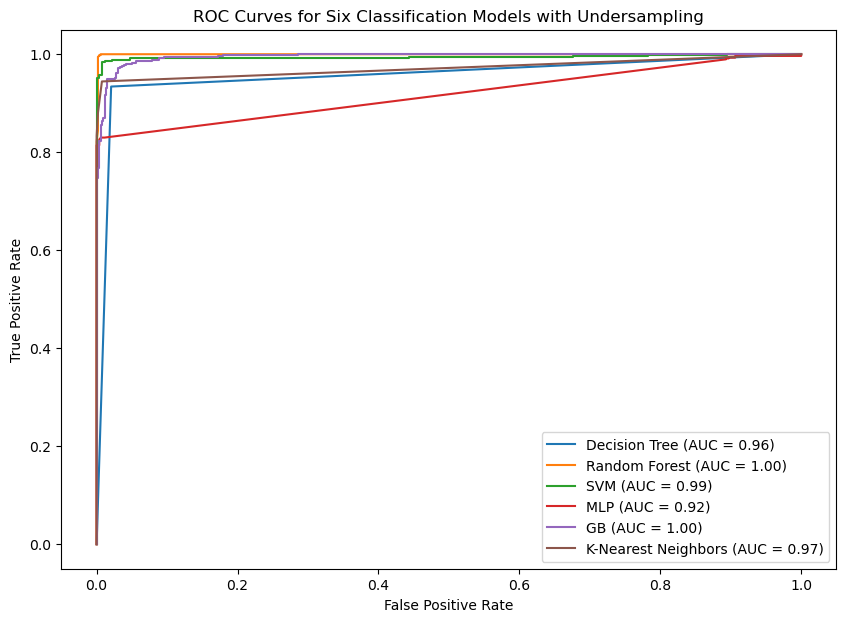

In [217]:
# Define the models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': svm.SVC(probability=True),
    'MLP': MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1,max_iter=2000),
    'GB': GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Plotting the ROC curves
plt.figure(figsize=(10, 7))

for model_name, model in models.items():
    # Train the model
    model.fit(X_train_under, y_train_under)
    
    # Get predicted probabilities
    y_prob = model.predict_proba(X_test_under)[:, 1]
    
    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test_under, y_prob, pos_label = 'user')
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Six Classification Models with Undersampling')
plt.legend()

# Display the plot
plt.show()

## ROC Curve for Oversampled Data

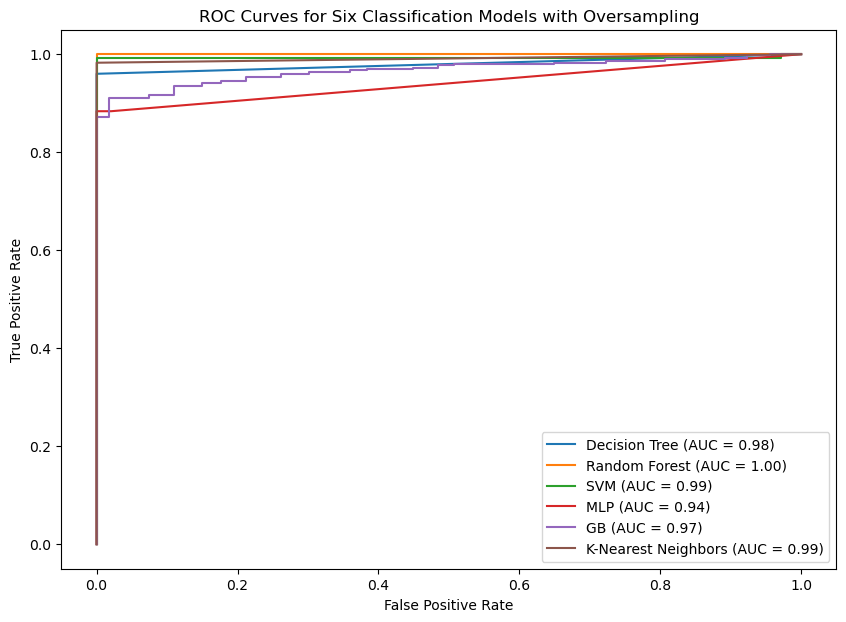

In [219]:
# Define the models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': svm.SVC(probability=True),
    'MLP': MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1),
    'GB': GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Plotting the ROC curves
plt.figure(figsize=(10, 7))

for model_name, model in models.items():
    # Train the model
    model.fit(X_train_over, y_train_over)
    
    # Get predicted probabilities
    y_prob = model.predict_proba(X_test_over)[:, 1]
    
    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test_over, y_prob, pos_label = 'user')
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Six Classification Models with Oversampling')
plt.legend()

# Display the plot
plt.show()

## ROC Curves Combined Data

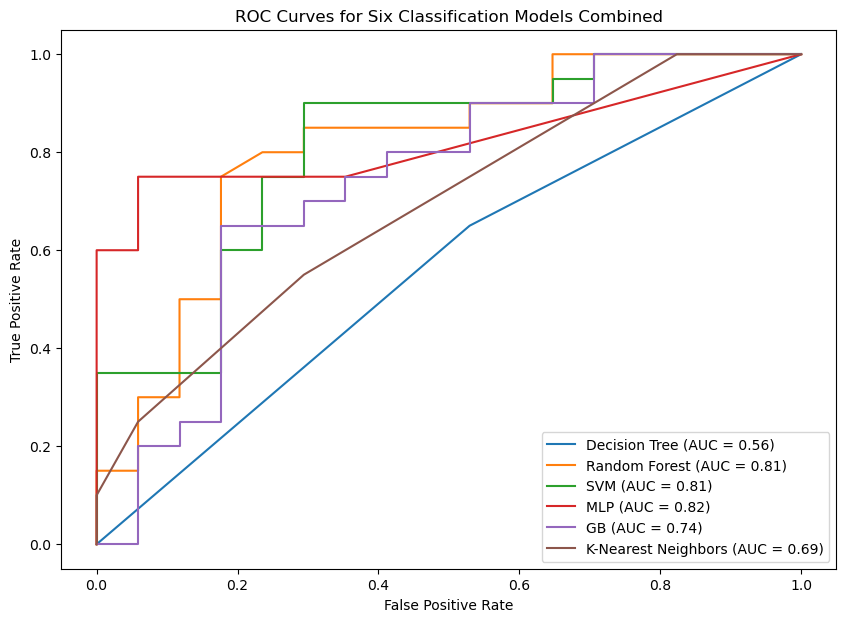

In [221]:
# Define the models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': svm.SVC(probability=True),
    'MLP': MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1),
    'GB': GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Plotting the ROC curves
plt.figure(figsize=(10, 7))

for model_name, model in models.items():
    # Train the model
    model.fit(X_train_combined, y_train_combined)
    
    # Get predicted probabilities
    y_prob = model.predict_proba(X_test_combined)[:, 1]
    
    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test_combined, y_prob, pos_label = 'user')
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Six Classification Models Combined')
plt.legend()

# Display the plot
plt.show()